<p style="background-color:#FFF;font-family:newtimeroman;color:#235c87;font-size:180%;text-align:center;border-style: solid;border-radius:8px 8px;border-color:#235c87;border-width: 5px;"> DIAMONDS PRICE PREDICTION 💎 </p>

#### [1. MULTIPLE LINEAR REGRESSION](#1)

#### [2. ABOUT DATASET](#2)

#### [3. IMPORTING LIBRARIES AND LOADING DATA](#3)
 
#### [4. EXPLORATORY DATA ANALYSIS (EDA) ](#4)

#### [5. PREPROCESSING](#5)

#### [6. MODELING](#6)

<a id="1"></a>
<p style="background-color:#FFF;font-family:newtimeroman;color:#235c87;font-size:180%;text-align:center;border-style: solid;border-radius:8px 8px;border-color:#235c87;border-width: 5px;"> MULTIPLE LINEAR REGRESSION </p>

Multiple linear regression attempts to model the relationship between two or more features and response by fitting a linear equation to observed data. The steps to perform multiple linear regresion are  almost similar to that of simple linear regression. The difference lies in the evaluation. You can use it to find out which factor has the highest impact on the predicted output and how factor has highest impact on the predicted output and how different variables relate to each other.


<center>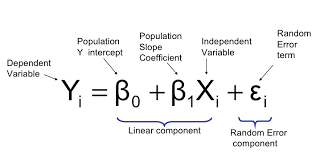</center>

<a id="2"></a>
<p style="background-color:#FFF;font-family:newtimeroman;color:#235c87;font-size:180%;text-align:center;border-style: solid;border-radius:8px 8px;border-color:#235c87;border-width: 5px;"> ABOUT DATASET </p>

* <b> price : </b> Price in US dollars ($326--$18,823)

* <b> carat : </b> Weight of the diamond (0.2--5.01)

* <b> cut : </b> Quality of the cut (Fair, Good, Very Good, Premium, Ideal)

* <b> color : </b> Diamond colour, from J (worst) to D (best)

* <b> clarity : </b> A measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

* <b> depth : </b> Total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

* <b> table : </b> Width of top of diamond relative to widest point (43--95)

* <b> x : </b> Length in mm (0--10.74)

* <b> y : </b> Width in mm (0--58.9)

* <b> z : </b> Depth in mm (0--31.8)


<a id="3"></a>
<p style="background-color:#FFF;font-family:newtimeroman;color:#235c87;font-size:180%;text-align:center;border-style: solid;border-radius:8px 8px;border-color:#235c87;border-width: 5px;"> IMPORTING LIBRARIES AND LOADING DATA </p>





In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
data = pd.read_csv("../input/diamonds/diamonds.csv")
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<a id="4"></a>
<p style="background-color:#FFF;font-family:newtimeroman;color:#235c87;font-size:180%;text-align:center;border-style: solid;border-radius:8px 8px;border-color:#235c87;border-width: 5px;"> EXPLORATORY DATA ANALYSIS 🔍</p>



In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,53940.0,26970.500000,15571.281097,1.0,13485.75,26970.50,40455.25,53940.00
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [5]:
nan = data.isnull().sum()
nan

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [6]:
data = data.drop(["Unnamed: 0"], axis=1)
data.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [7]:
s = (data.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['cut', 'color', 'clarity']


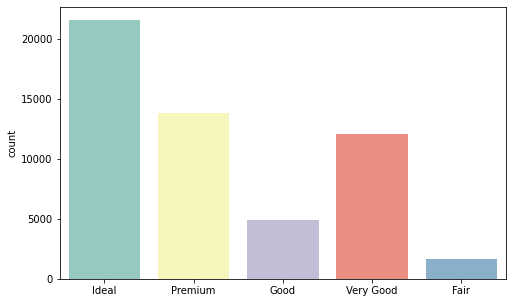

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64
-------------------------


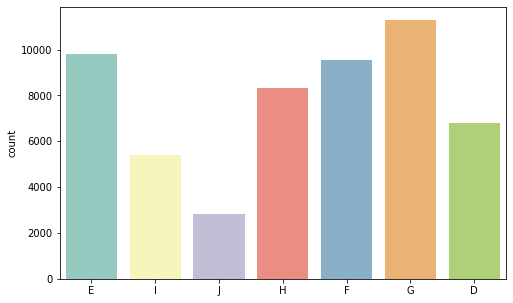

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64
-------------------------


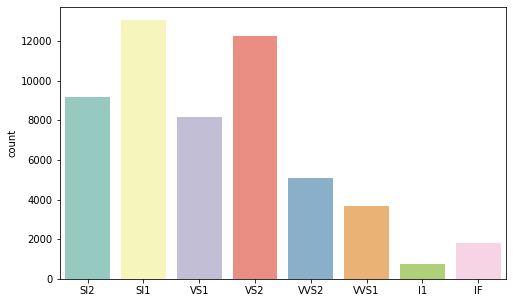

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64
-------------------------


In [8]:
for c in object_cols:
    plt.figure(figsize=(8,5))
    
    sns.countplot(x = data[c].to_numpy(),palette ="Set3")
    plt.show()
    print(data[c] .value_counts())
    print("-"*25)

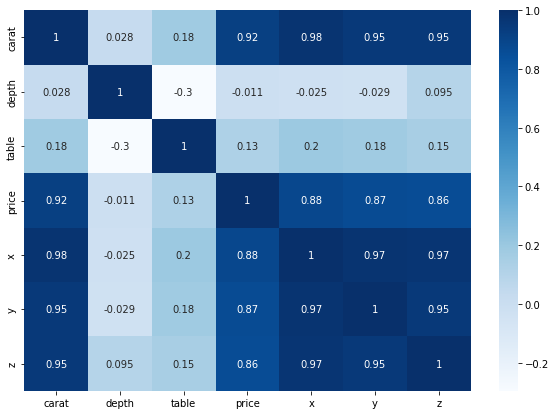

In [9]:
plt.figure(figsize = (10,7))
sns.heatmap(data.corr(), annot=True, cmap="Blues");

<a id="5"></a>
<p style="background-color:#FFF;font-family:newtimeroman;color:#235c87;font-size:180%;text-align:center;border-style: solid;border-radius:8px 8px;border-color:#235c87;border-width: 5px;">PREPROCESSING 🔨</p>

In [10]:
data = data.drop(data[data["x"]==0].index)
data = data.drop(data[data["y"]==0].index)
data = data.drop(data[data["z"]==0].index)
data.shape

(53920, 10)

In [11]:
label_encoder = LabelEncoder()
for col in object_cols:
    data[col] = label_encoder.fit_transform(data[col])
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


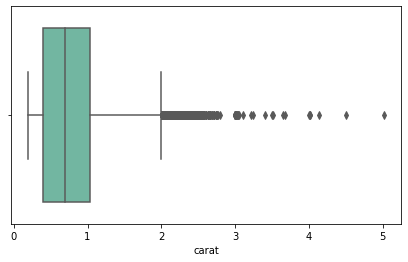

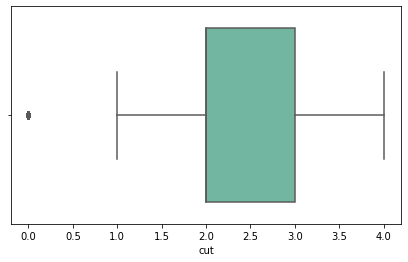

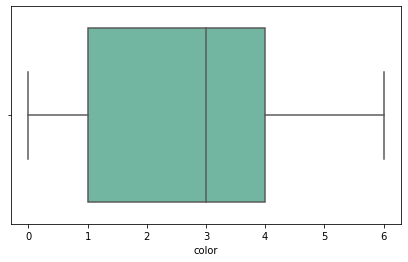

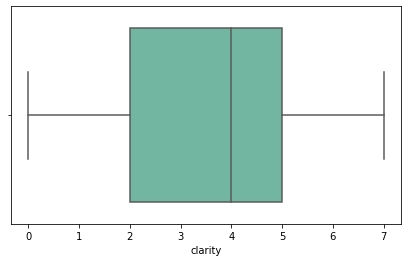

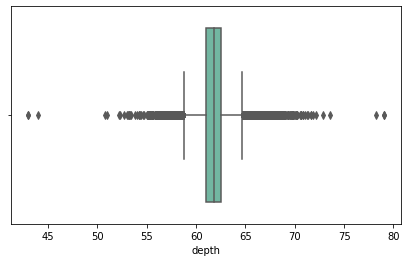

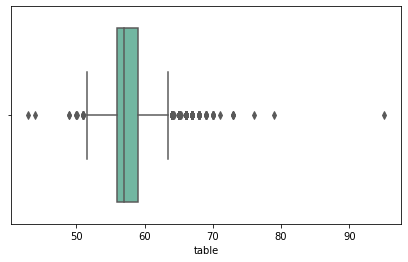

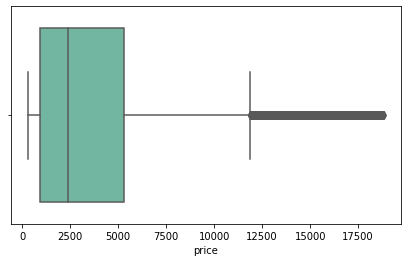

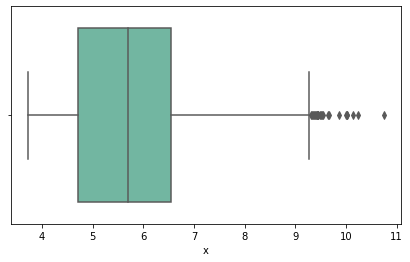

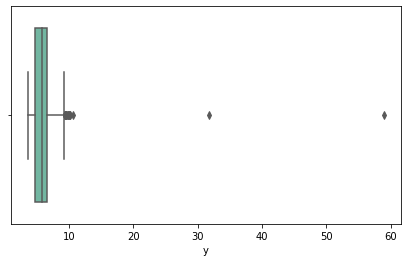

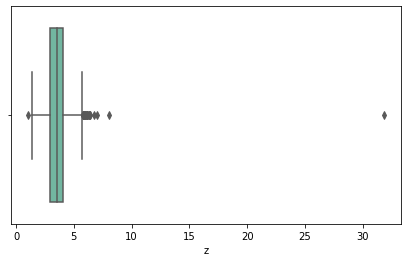

In [12]:
num_cols = data.keys()
for i in num_cols:
    plt.figure(figsize=(7,4))
    sns.boxplot(x=data[i],palette="Set2");
    plt.show()

In [13]:
def outlier_th(dataframe, col_name, q1, q3):
    q1 = dataframe[col_name].quantile(q1)
    q3 = dataframe[col_name].quantile(q3)
    iqr = q3 - q1
    low_limit = q1 - 1.5 * iqr
    up_limit = q3 + 1.5 * iqr
   
    return low_limit, up_limit

In [14]:
for c in num_cols:
    low, up = outlier_th(data, c ,q1=0.25, q3=0.75)
    data = data[~((data[c] < low) | (data[c] > up))]

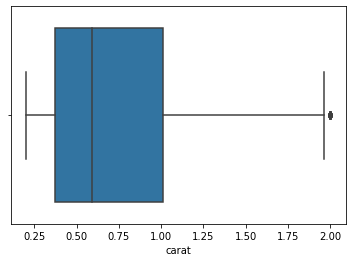

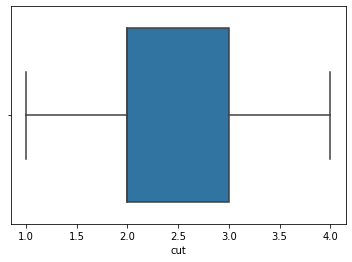

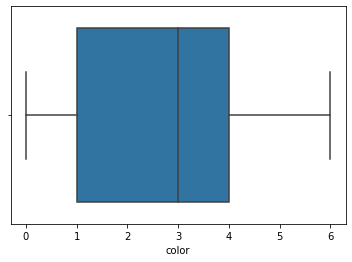

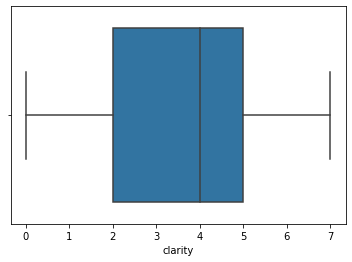

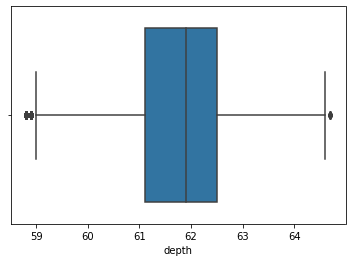

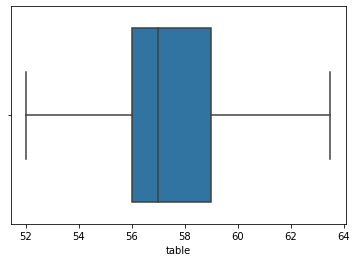

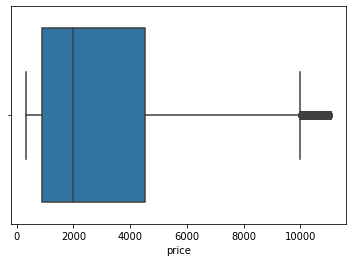

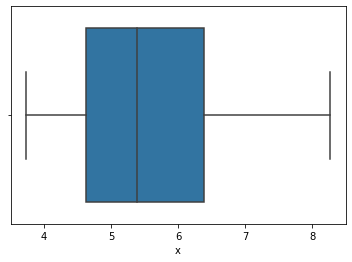

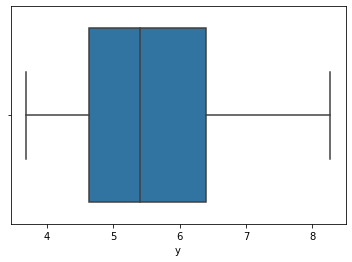

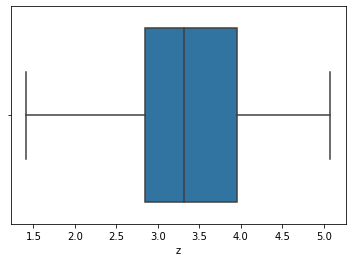

In [15]:
for c in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=data[c]);
    plt.show()

<a id="6"></a>
<p style="background-color:#FFF;font-family:newtimeroman;color:#235c87;font-size:180%;text-align:center;border-style: solid;border-radius:8px 8px;border-color:#235c87;border-width: 5px;">MODELING 🦾</p>

In [16]:
X = data.drop("price", axis = "columns")
y = data["price"]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [18]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [19]:
print("R^2 : ", r2_score(y_test, y_pred))
print("MSE :", mean_squared_error(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred)))

R^2 :  0.8945290386682037
MSE : 713673.0690581456
RMSE: 844.7917311729238


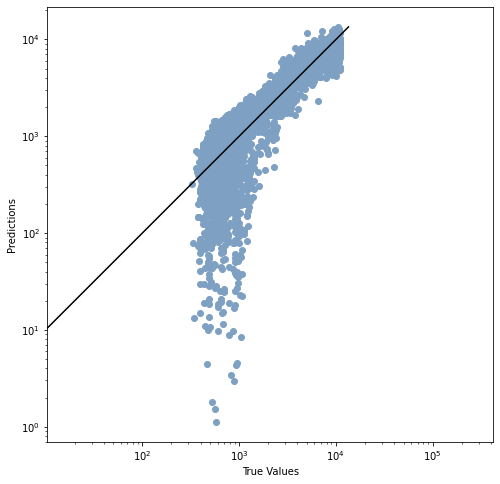

In [20]:
plt.figure(figsize=(8,8))
plt.scatter(y_test, y_pred, c="#7ea0c3")
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], "k-")
plt.xlabel('True Values', fontsize=10)
plt.ylabel('Predictions', fontsize=10)
plt.axis('equal')
plt.show()